there are some good time series data toward the bottom of this notebook, but for good loading rates (with the MOT not in continuous mode), see, e.g., Single atom characterization/trap_lifetime.ipynb Jan. 2024

In [1]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import os
import PIL # for reading tif images
import h5py
import datetime as dt
import time

results = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\"

def get_max_idx(data):
    """return max value and corresponding index for 1d data"""
    maxdat = 0
    maxidx = 0
    for i,dat in enumerate(data):
        if dat > maxdat:
            maxdat = dat
            maxidx = i
    return maxdat, maxidx

## May 2024

example of atoms falling into and out of the trap. the loading rate is poor, but this is good for clearly seeing the atoms come and go.

In [11]:
photocounts = []
file = 'tttt.csv'
file = 'goodloading.csv'
with open(file) as f:
    reader = csv.reader(f)
    reader.__next__()
    for row in reader:
        photocounts.append(float(row[1]))

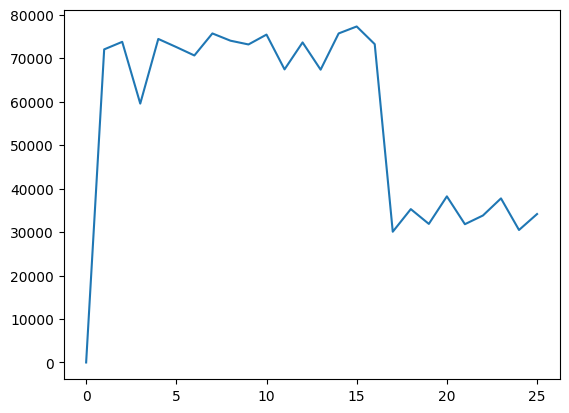

In [12]:
plt.plot(photocounts)

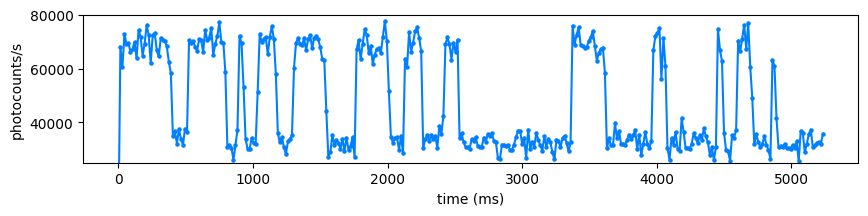

In [38]:
t_exp = 15e-3

color = (0.0, 0.5, 1, 1)#'cornflowerblue'
# plt.plot(np.arange(len(photocounts))*t_exp*1e3,photocounts,color=color) #, label='with MOT')
# plt.scatter(np.arange(len(photocounts))*t_exp*1e3,photocounts,color=color) #, label='with MOT')

idx_start = 0
idx_end = 350

fig,ax = plt.subplots(figsize=(10,4))
ax.plot(np.arange(idx_end-idx_start)*t_exp*1e3,photocounts[idx_start:idx_end],color=color) #, label='with MOT')
ax.scatter(np.arange(idx_end-idx_start)*t_exp*1e3,photocounts[idx_start:idx_end],color=color,s=5) #, label='with MOT')
aspect=0.02
ax.set_aspect(aspect)
ax.set_ylabel("photocounts/s")
ax.set_xlabel("time (ms)")
ax.set_ylim((25000,80000))
plt.savefig(f"2024-05-18_atom_loading_with_continuous_MOT_time_series_counts_aspect{aspect}.pdf",bbox_inches='tight')
plt.show()


## April 2024

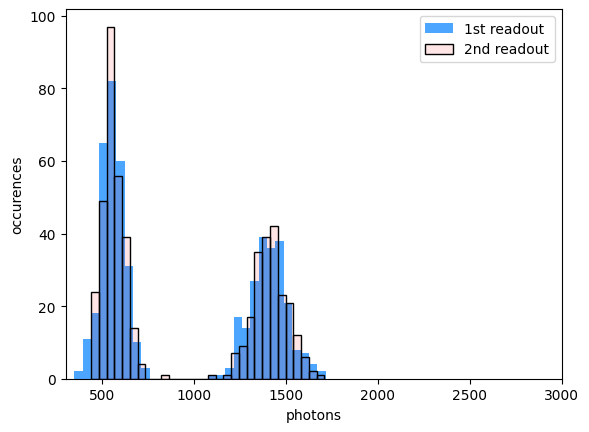

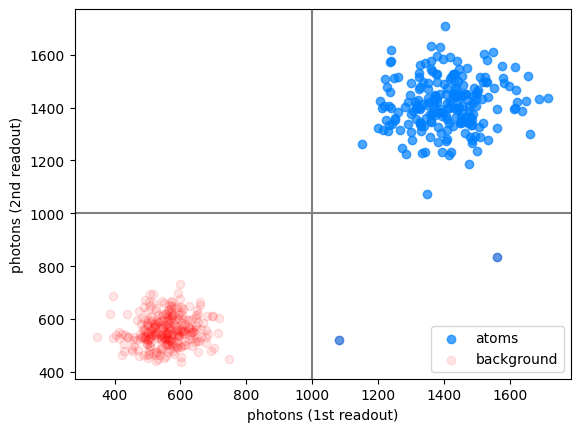

In [8]:
f = h5py.File(os.path.join(results, "2024-04-16\\14\\000012030-GeneralVariableScan_atom_loading.h5"))

n_measurements = np.uint(f['datasets']['n_measurements'])
t_SPCM_first_shot = np.float64(f['archive']['t_SPCM_first_shot'])
t_SPCM_second_shot = np.float64(f['archive']['t_SPCM_second_shot'])
single_atom_counts_per_s = np.float64(f['archive']['single_atom_counts_per_s'])
counts_shot1 = np.array(f['datasets']['photocounts'])[1:]
counts_shot2 = np.array(f['datasets']['photocounts2'])[1:]

iterations=1
cutoff1 = single_atom_counts_per_s*t_SPCM_first_shot
cutoff2 = single_atom_counts_per_s*t_SPCM_second_shot
retention_array = np.zeros(iterations)
loading_rate_array = np.zeros(iterations)
n_atoms_loaded_array = np.zeros(iterations)

measurements = n_measurements #if not control_experiment else n_measurements//2

for i in range(iterations):
    shot1 = counts_shot1[i*measurements:(i+1)*measurements]
    shot2 = counts_shot2[i*measurements:(i+1)*measurements]
    atoms_loaded = [x > cutoff1 for x in shot1]
    n_atoms_loaded = sum(atoms_loaded)
    atoms_retained = [x > cutoff2 and y for x,y in zip(shot2, atoms_loaded)]
    retention_fraction = 0 if not n_atoms_loaded > 0 else sum(atoms_retained)/sum(atoms_loaded)
    retention_array[i] = retention_fraction
    loading_rate_array[i] = n_atoms_loaded/n_measurements
    n_atoms_loaded_array[i] = n_atoms_loaded
fig,ax = plt.subplots()
a1=0.7
a2=0.1
ax.hist(shot1,bins=30, facecolor=(0.0, 0.5, 1, a1),label='1st readout')
ax.hist(shot2,bins=30, facecolor=(1.0, 0.0, 0.0, a2), edgecolor=(0, 0, 0, 1), linestyle='-',label='2nd readout')
ax.set_xlim((300,3000))
# range=[min(shot1)/t_SPCM_first_shot,max(shot2)/t_SPCM_first_shot]
# ax.set_title(f"retention={retention_array[0]:.2f}\nloading rate={loading_rate_array[0]:.2f}",fontsize=8)
ax.legend()
ax.set_ylabel("occurences")
ax.set_xlabel("photons")
plt.savefig("500_measurement_histogram_april2024.svg",bbox_inches='tight')

fig,ax = plt.subplots()
ax.scatter(shot1[shot1>cutoff1],shot2[shot1>cutoff1],color=(0.0, 0.5, 1, a1),label='atoms')
ax.scatter(shot1[shot2<cutoff1],shot2[shot2<cutoff1],color=(1.0, 0.0, 0.0, a2),label='background')
ax.axvline(1000,color='grey')
ax.axhline(1000,color='grey')
ax.set_xlabel("photons (1st readout)")
ax.set_ylabel("photons (2nd readout)")
ax.legend(loc='lower right')
# plt.savefig("500_measurement_scatter_plot_april2024.svg",bbox_inches='tight')


In [10]:
min(shot1)

347

In [4]:
cutoff1

0.000225

In [15]:
loading_rate_array

array([1.])

### March 2024

example of atoms falling into and out of the trap. the loading rate is poor, but this is good for clearly seeing the atoms come and go.

In [42]:
photocounts = []
with open('example_atoms_falling_in_and_out_of_trap_20240301.csv') as f:
    reader = csv.reader(f)
    reader.__next__()
    for row in reader:
        photocounts.append(float(row[1]))

In [43]:
len(photocounts)

400

In [44]:
photocounts[0]

14466.6666666667

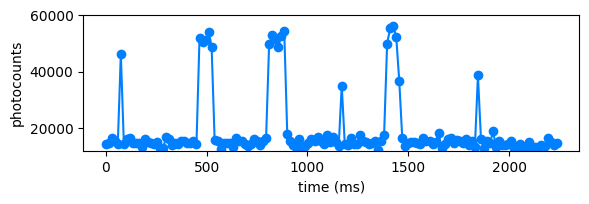

In [85]:
t_exp = 15e-3

color = (0.0, 0.5, 1, 1)#'cornflowerblue'
# plt.plot(np.arange(len(photocounts))*t_exp*1e3,photocounts,color=color) #, label='with MOT')
# plt.scatter(np.arange(len(photocounts))*t_exp*1e3,photocounts,color=color) #, label='with MOT')

idx_start = 0
idx_end = 150

fig,ax = plt.subplots()
ax.plot(np.arange(idx_end-idx_start)*t_exp*1e3,photocounts[idx_start:idx_end],color=color) #, label='with MOT')
ax.scatter(np.arange(idx_end-idx_start)*t_exp*1e3,photocounts[idx_start:idx_end],color=color) #, label='with MOT')
aspect=0.014
ax.set_aspect(aspect)
ax.set_ylabel("photocounts")
ax.set_xlabel("time (ms)")
ax.set_ylim((12000,60000))
# plt.savefig(f"2024-03-01_atom_loading_with_continuous_MOT_time_series_2s_counts_aspect{aspect}.png",bbox_inches='tight')
plt.show()


## October 2023

### 2023.10.23

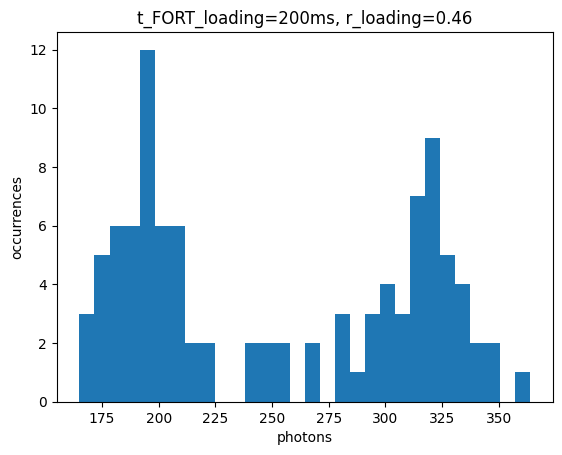

In [28]:
# this is the first experiment to load an atom but do turn off the MOT before doing readout. 
# despite the experiment name, for this particular run, I had only implemented atom loading -- no delay and second shot yet.
f = h5py.File(os.path.join(results, "2023-10-23\\10\\000006665-SingleAtomTrapLifetime.h5"))
# [x for x in f['datasets'].values()]
t_FORT_loading = np.single(f['archive']['t_FORT_loading'])
photocounts = np.array(f['datasets']['photocounts'])[1:]
measurements = np.uint(f['datasets']['n_measurements'])
# t_FORT_loading_list.append(t_FORT_loading)
# photocounts_list.append(photocounts)

threshold = 260
atoms = len(photocounts[photocounts>threshold])
r_loading = atoms/len(photocounts)
plt.hist(photocounts, bins=bins)#,alpha=0.5)
plt.title(f't_FORT_loading={t_FORT_loading/0.001:.0f}ms, r_loading={r_loading:.2f}')
plt.xlabel("photons")
plt.ylabel("occurrences")
# plt.savefig(f'atom_loading_20231012_{bins}_bins.pdf')
plt.show()

In [24]:
ids = ['2023-10-23\\09\\000006656','2023-10-23\\09\\000006661','2023-10-23\\10\\000006663']
t_FORT_loading_list = []
photocounts_list = []
for id in ids:
    f = h5py.File(os.path.join(results, f'{id}-SimpleAtomTrapNoChop.h5'))
    # [x for x in f['datasets'].values()]
    t_FORT_loading = np.single(f['archive']['t_FORT_loading'])
    photocounts = np.array(f['datasets']['photocounts'])[1:]
    measurements = np.uint(f['datasets']['n_measurements'])
    t_FORT_loading_list.append(t_FORT_loading)
    photocounts_list.append(photocounts)

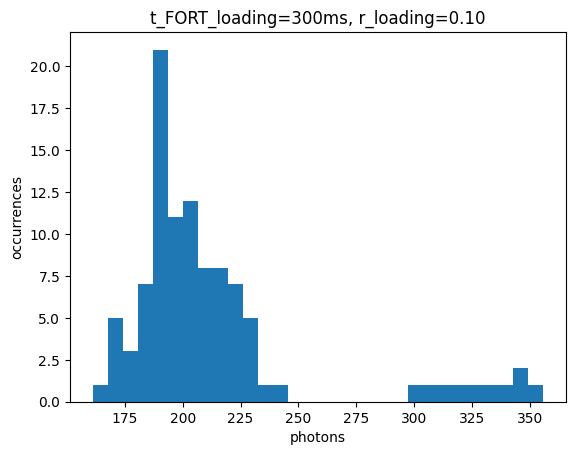

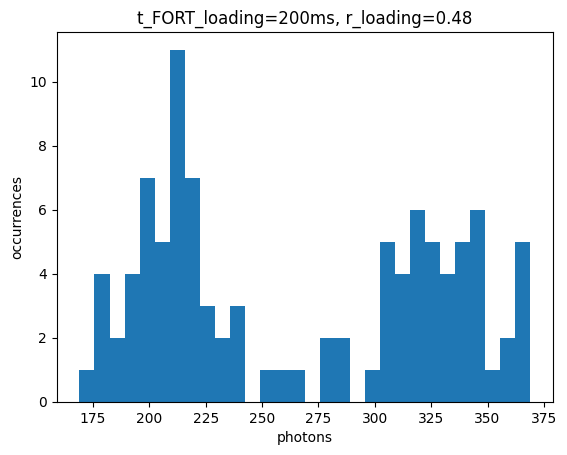

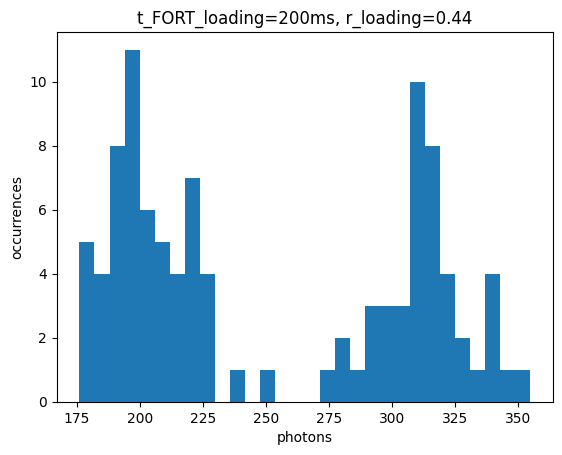

In [26]:
bins = 30
threshold = 270
for t_FORT_loading,photocounts in zip(t_FORT_loading_list,photocounts_list):
    atoms = len(photocounts[photocounts>threshold])
    r_loading = atoms/len(photocounts)
    plt.hist(photocounts, bins=bins)#,alpha=0.5)
    plt.title(f't_FORT_loading={t_FORT_loading/0.001:.0f}ms, r_loading={r_loading:.2f}')
    plt.xlabel("photons")
    plt.ylabel("occurrences")
    # plt.savefig(f'atom_loading_20231012_{bins}_bins.pdf')
    plt.show()

### 2023.10.20

today I checked the atom loading rate for different FORT loading times. the rate is noticeably too low at 100 ms, but seems okay at 200 ms or longer. probably somewhere between these is the sweet spot

In [16]:
ids = ['000006647','000006649','000006651']
t_FORT_loading_list = []
photocounts_list = []
for id in ids:
    f = h5py.File(os.path.join(results, f'2023-10-20\\13\\{id}-SimpleAtomTrapNoChop.h5'))
    # [x for x in f['datasets'].values()]
    t_FORT_loading = np.single(f['archive']['t_FORT_loading'])
    photocounts = np.array(f['datasets']['photocounts'])[1:]
    measurements = np.uint(f['datasets']['n_measurements'])
    t_FORT_loading_list.append(t_FORT_loading)
    photocounts_list.append(photocounts)

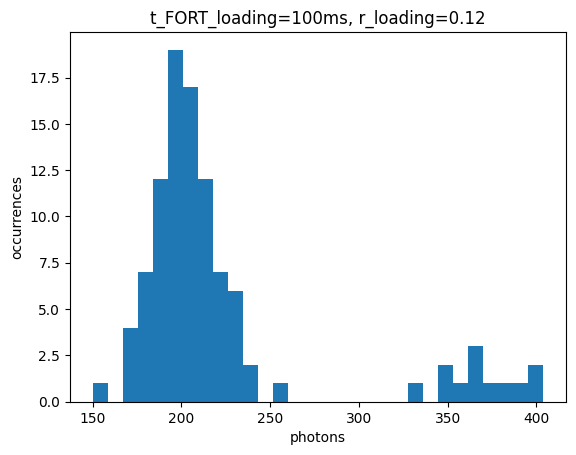

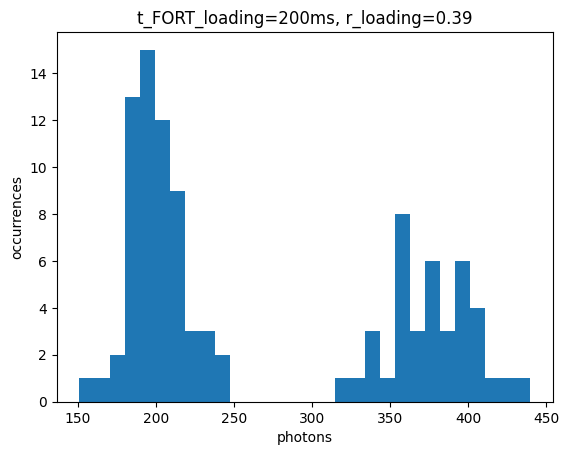

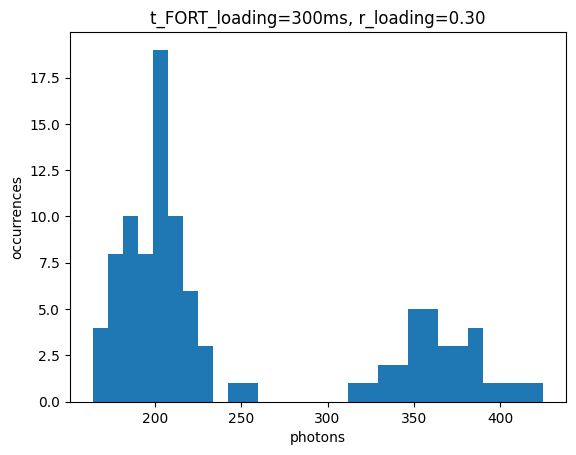

In [17]:
bins = 30
threshold = 300
for t_FORT_loading,photocounts in zip(t_FORT_loading_list,photocounts_list):
    atoms = len(photocounts[photocounts>threshold])
    r_loading = atoms/len(photocounts)
    plt.hist(photocounts, bins=bins)#,alpha=0.5)
    plt.title(f't_FORT_loading={t_FORT_loading/0.001:.0f}ms, r_loading={r_loading:.2f}')
    plt.xlabel("photons")
    plt.ylabel("occurrences")
    # plt.savefig(f'atom_loading_20231012_{bins}_bins.pdf')
    plt.show()

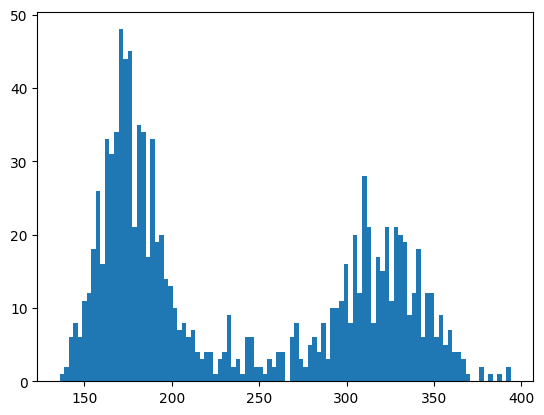

loading rate: 0.41


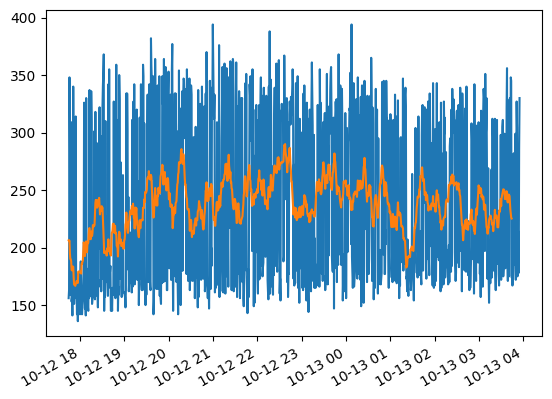

In [112]:
photocounts = photocounts_all
plt.hist(photocounts, bins=100,label='with MOT')
# plt.hist(photocounts_control, bins=100,label='no MOT', edgecolor=(1, 0.5, 0.2, 1), facecolor=(1, 0.5, 0.2, 0.5))
# plt.legend()
# plt.xlim((4000,5800))
plt.show()

pc = np.array(photocounts)
loading_rate = sum([1 for x in pc if x > 250])/len(pc)
print(f"loading rate: {loading_rate:.2f}")

plt.plot(datetimes,photocounts, label='with MOT')
avgs = 20
plt.plot(datetimes[:-avgs+1],np.convolve(photocounts,np.ones(avgs)/avgs,mode='valid'), label='rolling avg')
# plt.legend()
# plt.ylim((4000,5800))
plt.gcf().autofmt_xdate()
plt.show()

### 2023.10.13

last night I tested the persistence of atom loading over the course of 9 hours, doing an atom loading experiment every 30 s after feeding back to the MOT beams then loading a MOT for 1 s. The dipole trap was turned on for 300 ms, then the SPCM exposed for 10 ms. This is the same sequence which was used for the first atom loading experiment we did.

In [128]:
f = h5py.File(os.path.join(results, '2023-10-12\\17\\000006320-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
t_exp = np.single(f['datasets']['dt_exposure'])
photocounts_all = list(f['datasets']['photocounts'])[1:]
measurements = np.uint(f['datasets']['n_measurements'])

# photocounts_control = [photocounts_all[i]/t_exp for i in range(len(photocounts_all)) if i%2==0]
# photocounts = [photocounts_all[i]/t_exp for i in range(len(photocounts_all)) if i%2==1]

In [129]:
t_exp

0.01

In [106]:
measurements

1080

In [107]:
# with open('first_single_photon_data.csv','w') as f:
#     writer = csv.writer(f)
#     writer.writerow(photocounts)

In [108]:
t_start = np.uint(f['run_time'])
t_end = time.mktime(dt.datetime(2023, 10, 13, 3, 55).timetuple())
datetimes = [dt.datetime.fromtimestamp(t) for t in np.linspace(t_start, t_end, len(photocounts_all))]

In [109]:
t_start

1697150672

In [120]:
os.getcwd()

'D:\\Networking Exp Data\\Atom loading histograms'

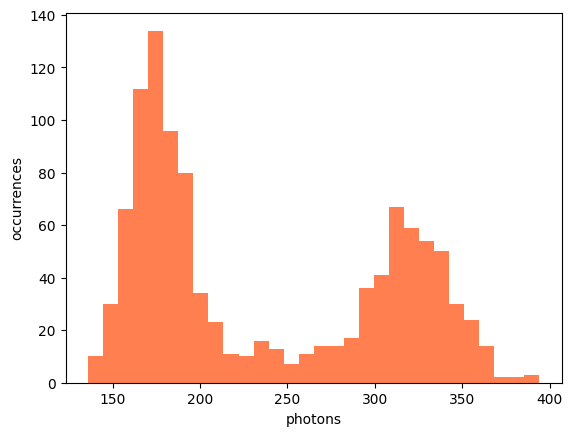

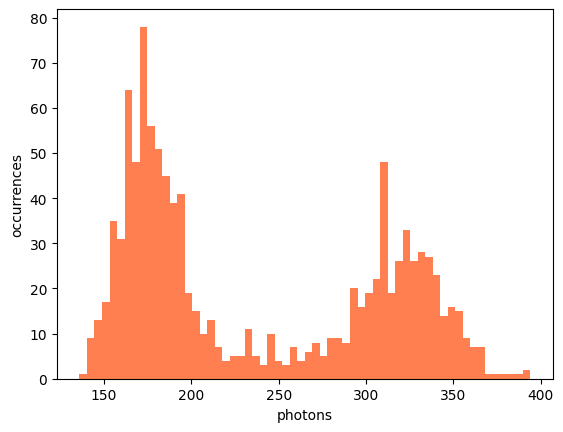

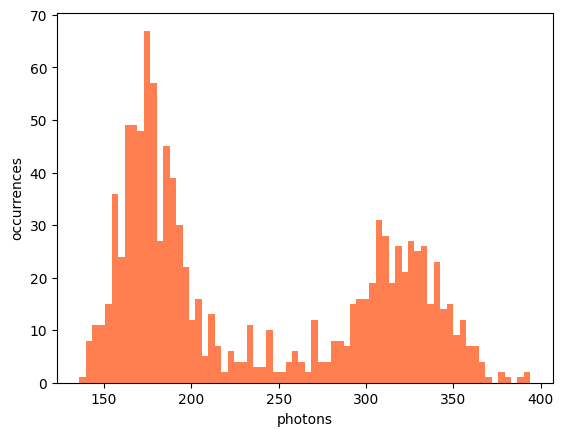

In [127]:
photocounts = photocounts_all
for bins in [30,60,70]:
    plt.hist(photocounts, bins=bins,label='with MOT',color='coral')
    plt.xlabel("photons")
    plt.ylabel("occurrences")
    # plt.savefig(f'atom_loading_20231012_{bins}_bins.pdf')
    plt.show()

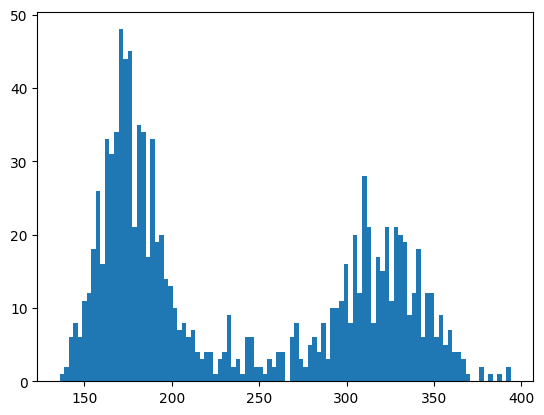

loading rate: 0.41


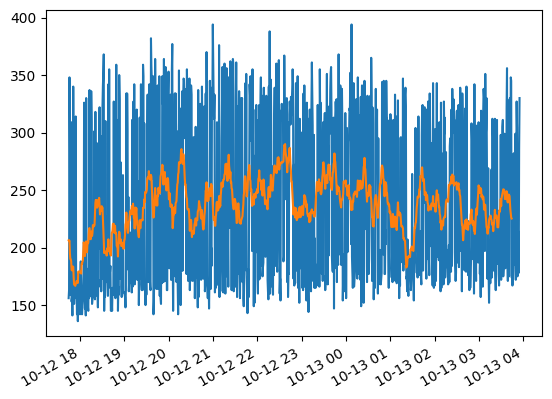

In [112]:
photocounts = photocounts_all
plt.hist(photocounts, bins=100,label='with MOT')
# plt.hist(photocounts_control, bins=100,label='no MOT', edgecolor=(1, 0.5, 0.2, 1), facecolor=(1, 0.5, 0.2, 0.5))
# plt.legend()
# plt.xlim((4000,5800))
plt.show()

pc = np.array(photocounts)
loading_rate = sum([1 for x in pc if x > 250])/len(pc)
print(f"loading rate: {loading_rate:.2f}")

plt.plot(datetimes,photocounts, label='with MOT')
avgs = 20
plt.plot(datetimes[:-avgs+1],np.convolve(photocounts,np.ones(avgs)/avgs,mode='valid'), label='rolling avg')
# plt.legend()
# plt.ylim((4000,5800))
plt.gcf().autofmt_xdate()
plt.show()

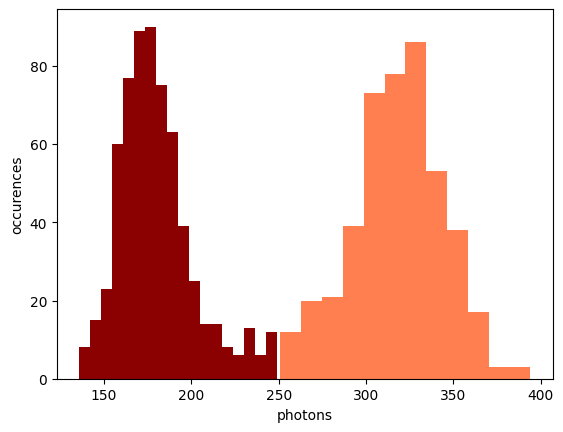

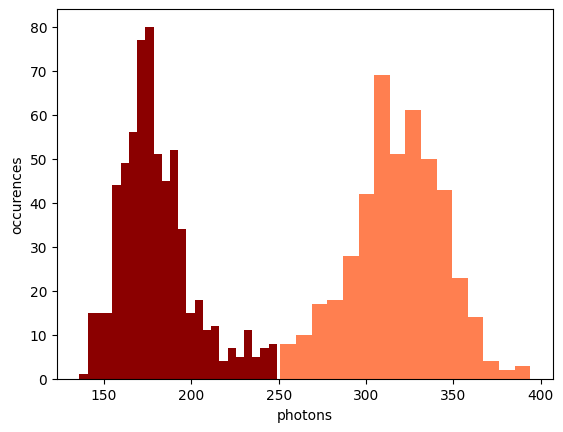

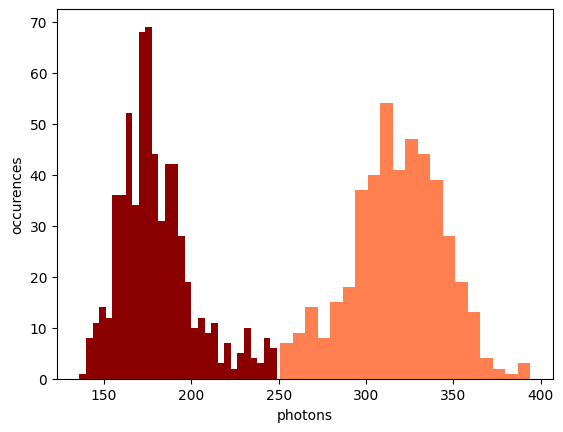

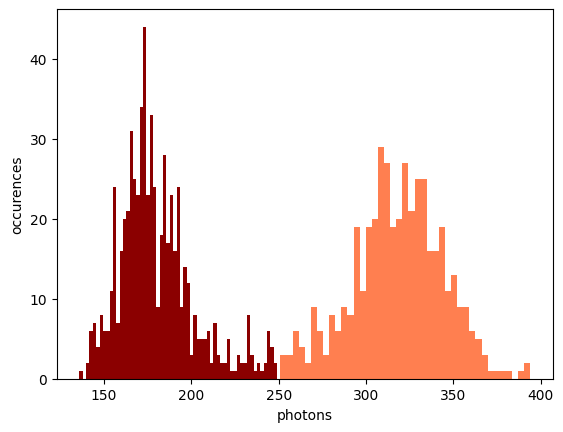

In [115]:
pc = np.array(photocounts)

threshold = 250
atoms = [x for x in pc if x > threshold]
no_atoms = [x for x in pc if x <= threshold]

for bins in [30,40,50,100]:
    atom_bins = int(bins*len(atoms)/len(pc))
    no_bins = bins - atom_bins
    plt.hist(atoms, bins=atom_bins,color='coral')
    plt.hist(no_atoms, bins=no_bins,color='darkred')
    plt.xlabel("photons")
    plt.ylabel("occurences")
    plt.show()

In [114]:
len(atoms)

0

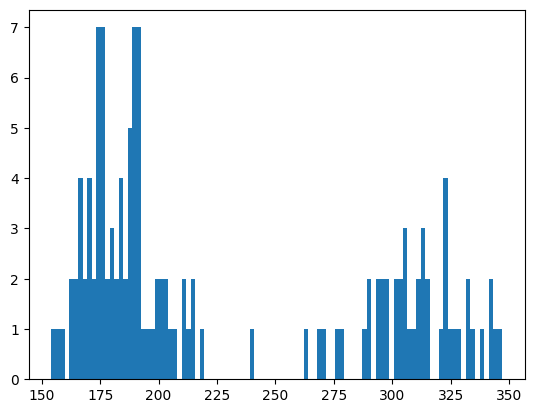

loading rate: 0.36



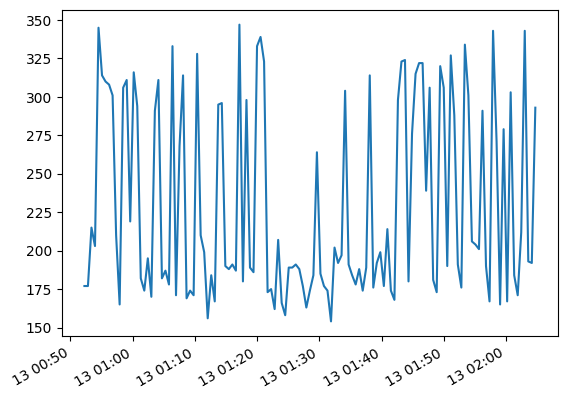

In [67]:
# limited range to see where loading drops out
photocounts = photocounts_all
istart = int(0.7*measurements)
iend = int(0.82*measurements)

plt.hist(photocounts[istart:iend], bins=100,label='with MOT')
# plt.hist(photocounts_control, bins=100,label='no MOT', edgecolor=(1, 0.5, 0.2, 1), facecolor=(1, 0.5, 0.2, 0.5))
# plt.legend()
# plt.xlim((4000,5800))
plt.show()

plt.plot(datetimes[istart:iend],photocounts[istart:iend], label='with MOT')

pc = np.array(photocounts[istart:iend])
loading_rate = sum([1 for x in pc if x > 250])/len(pc)
print(f"loading rate: {loading_rate:.2f}")

print()

avgs = 20
# plt.plot(datetimes[:-avgs],np.convolve(photocounts,np.ones(avgs)/avgs,mode='valid'), label='rolling avg')
# plt.legend()
# plt.ylim((4000,5800))
plt.gcf().autofmt_xdate()
plt.show()

### 2023.10.04

In [10]:
# f = h5py.File(os.path.join(results, '2023-10-04\\12\\000006030-SimpleAtomTrapNoChop.h5'))
f = h5py.File(os.path.join(results, '2023-10-04\\15\\000006055-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
t_exp = np.single(f['datasets']['dt_exposure'])
photocounts_all = list(f['datasets']['photocounts'])[1:]
photocounts_control = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==0]
photocounts = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==1]

In [11]:
t_exp

0.01

In [12]:
with open('first_single_photon_data.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(photocounts)

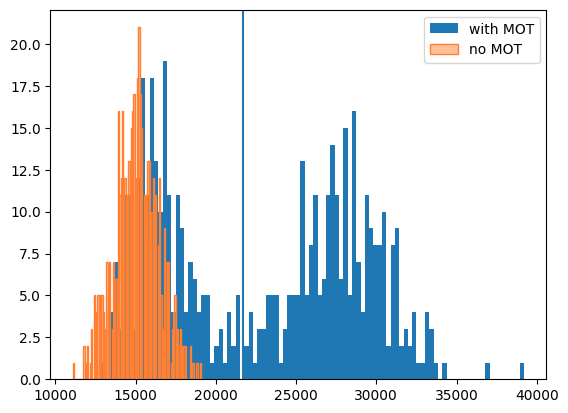

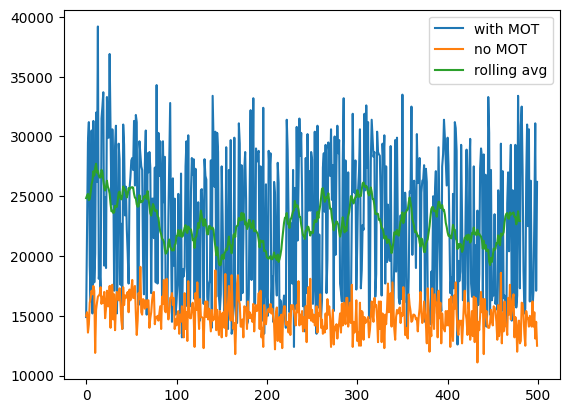

In [16]:
plt.hist(photocounts/t_exp, bins=100,label='with MOT')
plt.hist(photocounts_control/t_exp, bins=100,label='no MOT', edgecolor=(1, 0.5, 0.2, 1), facecolor=(1, 0.5, 0.2, 0.5))
plt.axvline(21700)
plt.legend()
# plt.xlim((4000,5800))
plt.show()

plt.plot(photocounts/t_exp, label='with MOT')
plt.plot(photocounts_control/t_exp, label='no MOT')
plt.plot(np.convolve(photocounts/t_exp,np.ones(20)/20,mode='valid'), label='rolling avg')
plt.legend()
# plt.ylim((4000,5800))
plt.show()

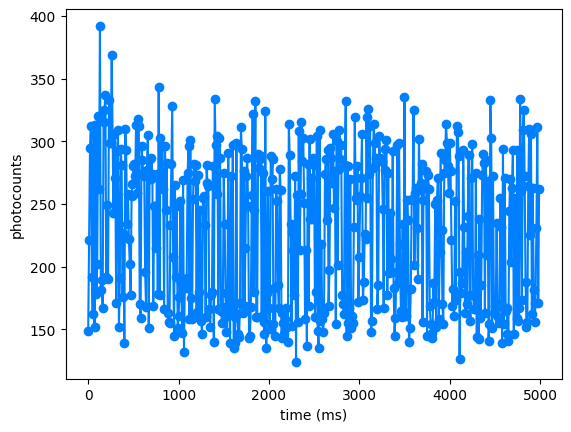

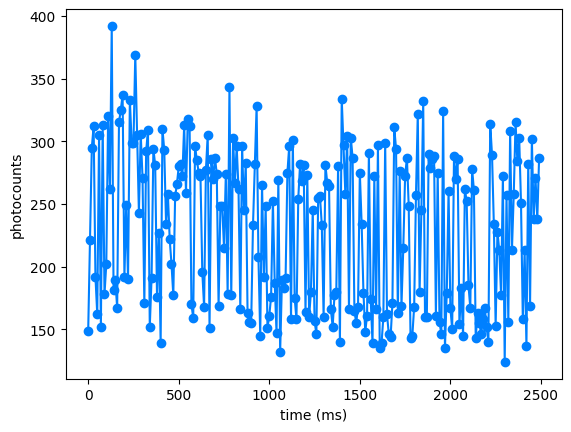

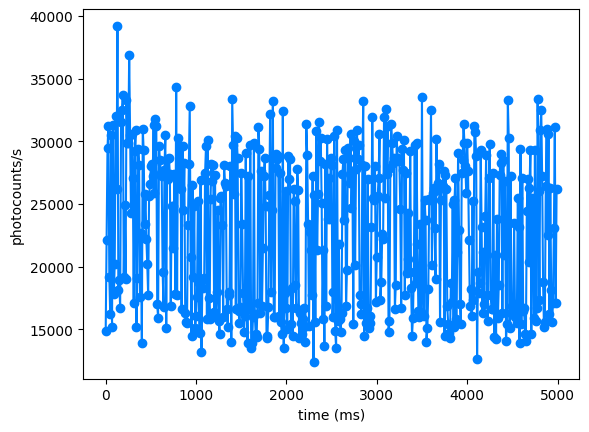

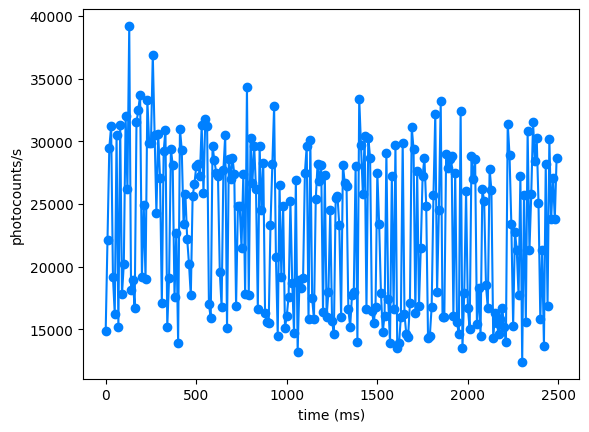

In [34]:
# plt.hist(photocounts, bins=100,label='with MOT')
# plt.hist(photocounts_control, bins=100,label='no MOT', edgecolor=(1, 0.5, 0.2, 1), facecolor=(1, 0.5, 0.2, 0.5))
# # plt.axvline(21700)
# plt.legend()
# # plt.xlim((4000,5800))
# plt.show()
color = (0.0, 0.5, 1, 1)#'cornflowerblue'
plt.plot(np.arange(len(photocounts))*t_exp*1e3,photocounts,color=color) #, label='with MOT')
plt.scatter(np.arange(len(photocounts))*t_exp*1e3,photocounts,color=color) #, label='with MOT')

plt.ylabel("photocounts")
plt.xlabel("time (ms)")
# plt.savefig("2023-10-04_atom_loading_with_continuous_MOT_time_series_5s_counts2.png",bbox_inches='tight')
plt.show()

idx_end = 250
plt.plot(np.arange(idx_end)*t_exp*1e3,photocounts[:idx_end],color=color) #, label='with MOT')
plt.scatter(np.arange(idx_end)*t_exp*1e3,photocounts[:idx_end],color=color) #, label='with MOT')

plt.ylabel("photocounts")
plt.xlabel("time (ms)")
# plt.savefig("2023-10-04_atom_loading_with_continuous_MOT_time_series_1s_counts2.png",bbox_inches='tight')
plt.show()

plt.plot(np.arange(len(photocounts))*t_exp*1e3,photocounts/t_exp,color=color) #, label='with MOT')
plt.scatter(np.arange(len(photocounts))*t_exp*1e3,photocounts/t_exp,color=color) #, label='with MOT')

plt.ylabel("photocounts/s")
plt.xlabel("time (ms)")
# plt.savefig("2023-10-04_atom_loading_with_continuous_MOT_time_series_5s_counts_per_s2.png",bbox_inches='tight')
plt.show()

idx_end = 250
plt.plot(np.arange(idx_end)*t_exp*1e3,photocounts[:idx_end]/t_exp,color=color) #, label='with MOT')
plt.scatter(np.arange(idx_end)*t_exp*1e3,photocounts[:idx_end]/t_exp,color=color) #, label='with MOT')

plt.ylabel("photocounts/s")
plt.xlabel("time (ms)")
plt.savefig("2023-10-04_atom_loading_with_continuous_MOT_time_series_1s_counts_per_s2.png",bbox_inches='tight')
plt.show()
# plt.plot(photocounts_control, label='no MOT')
# plt.plot(np.convolve(photocounts,np.ones(20)/20,mode='valid'), label='rolling avg')
# plt.legend()
# plt.ylim((4000,5800))
plt.show()

In [20]:
len(photocounts)

500

In [93]:
int(bins*len(atoms)/len(pc))

17

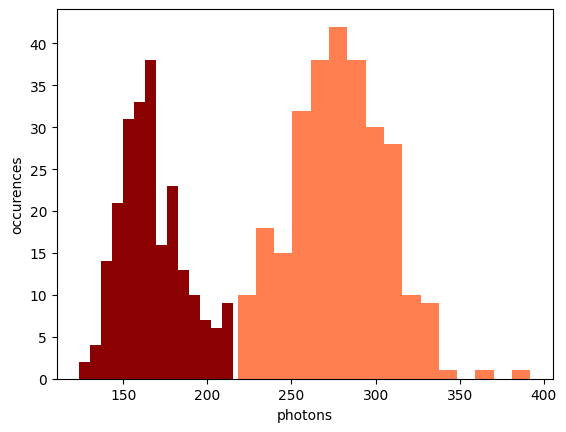

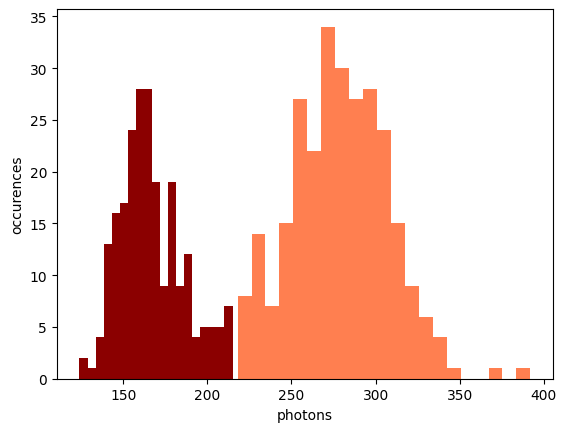

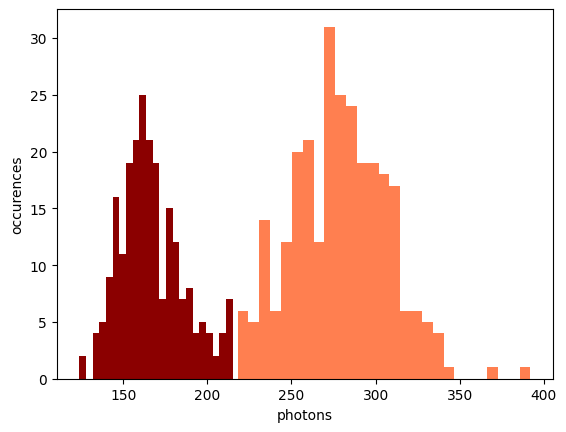

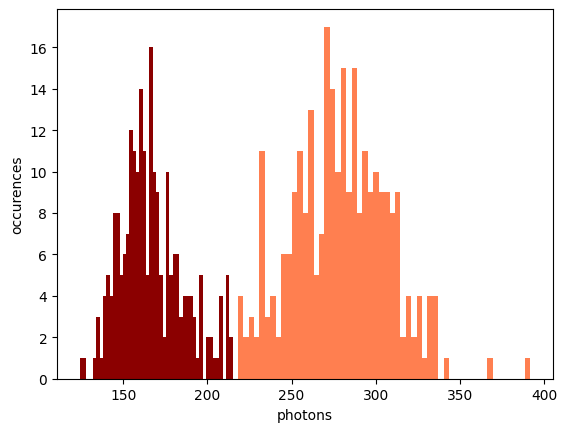

In [104]:
pc = np.array(photocounts)*0.01

threshold = 217
atoms = [x for x in pc if x > threshold]
no_atoms = [x for x in pc if x <= threshold]

for bins in [30,40,50,100]:
    atom_bins = int(bins*len(atoms)/len(pc))
    no_bins = bins - atom_bins
    plt.hist(atoms, bins=atom_bins,color='coral')
    plt.hist(no_atoms, bins=no_bins,color='darkred')
    plt.xlabel("photons")
    plt.ylabel("occurences")
    plt.show()

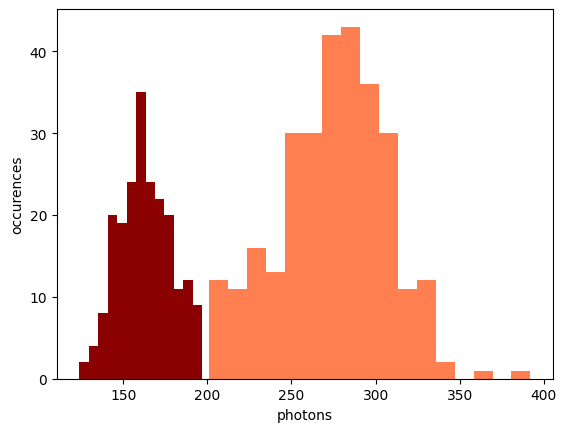

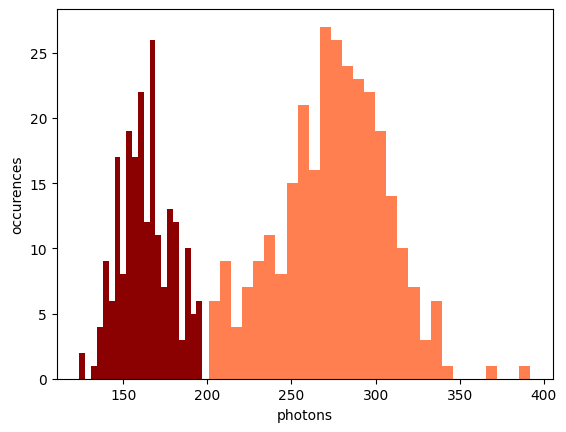

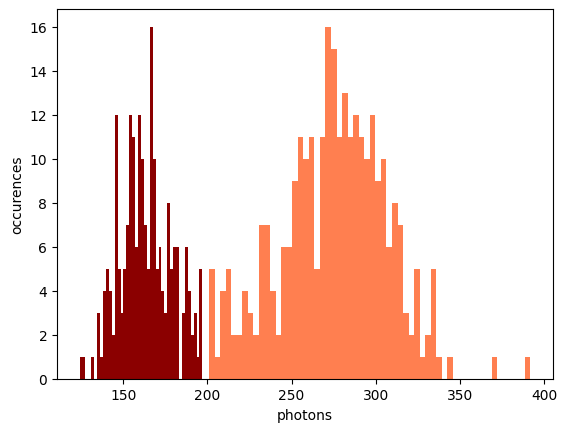

In [94]:
pc = np.array(photocounts)*0.01

threshold = 200
atoms = [x for x in pc if x > threshold]
no_atoms = [x for x in pc if x <= threshold]

for bins in [30,50,100]:
    atom_bins = int(bins*len(atoms)/len(pc))
    no_bins = bins - atom_bins
    plt.hist(atoms, bins=atom_bins,color='coral')
    plt.hist(no_atoms, bins=no_bins,color='darkred')
    plt.xlabel("photons")
    plt.ylabel("occurences")
    plt.show()

## September 2023

### 2023.09.12

In [176]:
t_exp = 0.01
f = h5py.File(os.path.join(results, '2023-09-12\\14\\000005182-SimpleAtomTrapNoChopCoilTune.h5'))
# [x for x in f['datasets'].values()]
photocounts_all = list(f['datasets']['photocounts'])[1:]
photocounts_control = [photocounts_all[i]/t_exp for i in range(len(photocounts_all)) if i%2==0]
photocounts = [photocounts_all[i]/t_exp for i in range(len(photocounts_all)) if i%2==1]

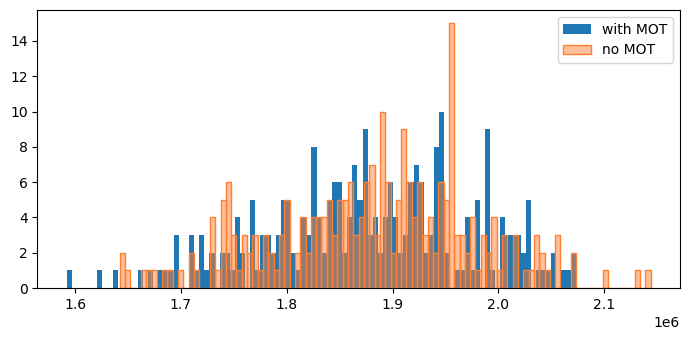

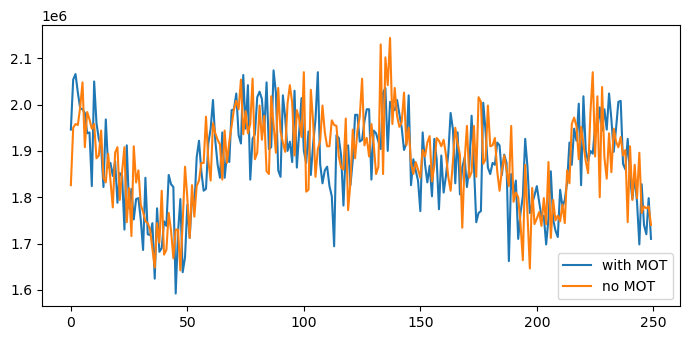

In [177]:
plt.hist(photocounts, bins=100,label='with MOT')
plt.hist(photocounts_control, bins=100,label='no MOT', edgecolor=(1, 0.5, 0.2, 1), facecolor=(1, 0.5, 0.2, 0.5))
plt.legend()
# plt.xlim((4000,5800))
plt.show()

plt.plot(photocounts, label='with MOT')
plt.plot(photocounts_control, label='no MOT')
plt.legend()
# plt.ylim((4000,5800))
plt.show()

### 2023.09.12

In [174]:
t_exp = 0.01
f = h5py.File(os.path.join(results, '2023-09-12\\13\\000005180-SimpleAtomTrapNoChopCoilTune.h5'))
# [x for x in f['datasets'].values()]
photocounts_all = list(f['datasets']['photocounts'])[1:]
photocounts_control = [photocounts_all[i]/t_exp for i in range(len(photocounts_all)) if i%2==0]
photocounts = [photocounts_all[i]/t_exp for i in range(len(photocounts_all)) if i%2==1]

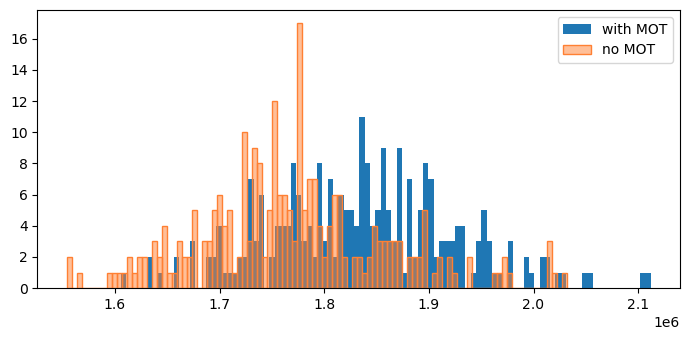

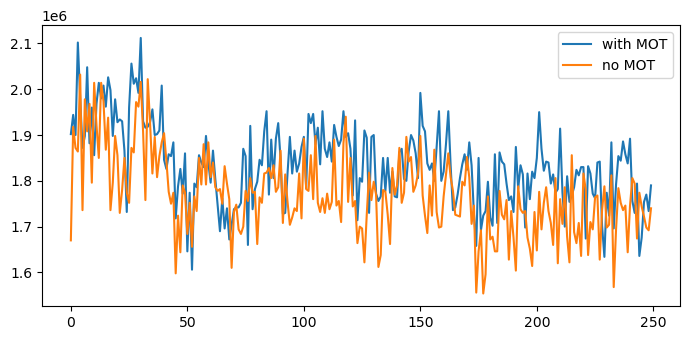

In [175]:
plt.hist(photocounts, bins=100,label='with MOT')
plt.hist(photocounts_control, bins=100,label='no MOT', edgecolor=(1, 0.5, 0.2, 1), facecolor=(1, 0.5, 0.2, 0.5))
plt.legend()
# plt.xlim((4000,5800))
plt.show()

plt.plot(photocounts, label='with MOT')
plt.plot(photocounts_control, label='no MOT')
plt.legend()
# plt.ylim((4000,5800))
plt.show()

### 2023.09.07

this shows that there is no signal from the MOT, since the control signal from the SPCM is the same as when there is a MOT 
(the SPCM exposure happened with the MOT still on). The FORT background is about 12000 cts/s and the fluorescence is about
6000, so ~ 18000 makes sense.

In [171]:
t_exp = 0.01
f = h5py.File(os.path.join(results, '2023-09-07\\11\\000005068-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts_all = list(f['datasets']['photocounts'])[1:]
photocounts_control = [photocounts_all[i]/t_exp for i in range(len(photocounts_all)) if i%2==0]
photocounts = [photocounts_all[i]/t_exp for i in range(len(photocounts_all)) if i%2==1]

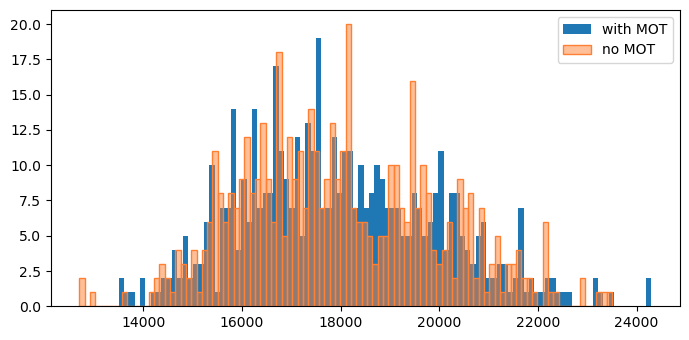

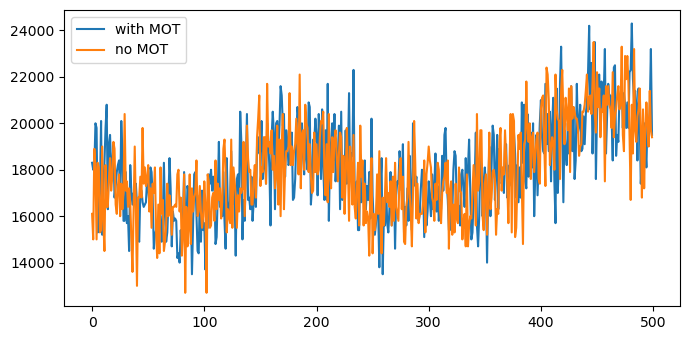

In [172]:
plt.hist(photocounts, bins=100,label='with MOT')
plt.hist(photocounts_control, bins=100,label='no MOT', edgecolor=(1, 0.5, 0.2, 1), facecolor=(1, 0.5, 0.2, 0.5))
plt.legend()
# plt.xlim((4000,5800))
plt.show()

plt.plot(photocounts, label='with MOT')
plt.plot(photocounts_control, label='no MOT')
plt.legend()
# plt.ylim((4000,5800))
plt.show()

### 2023.09.05

control is with the y shim offset to intentionally lose the MOT

In [108]:
f = h5py.File(os.path.join(results, '2023-09-05\\17\\000004965-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts_all = list(f['datasets']['photocounts'])[1:]
photocounts_control = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==0]
photocounts = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==1]

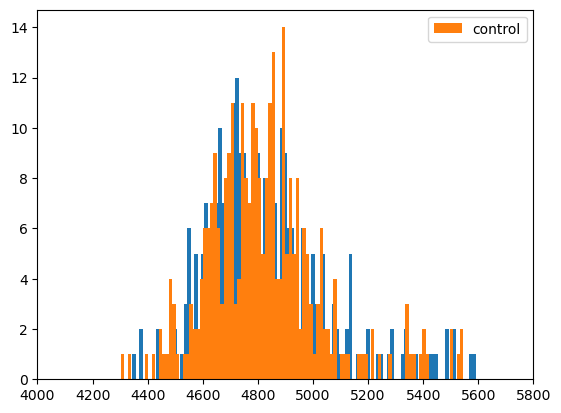

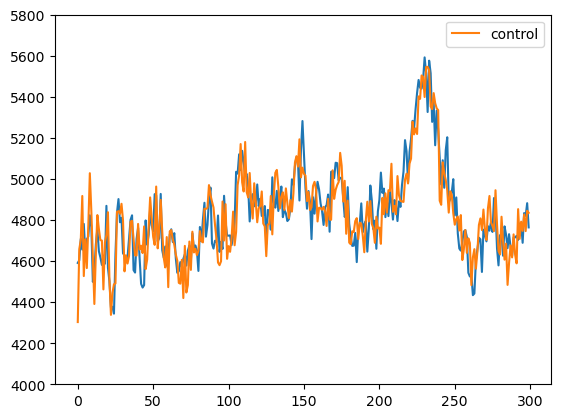

In [113]:
plt.hist(photocounts, bins=100)
plt.hist(photocounts_control, bins=100,label='control')
plt.legend()
plt.xlim((4000,5800))
plt.show()
plt.plot(photocounts)
plt.plot(photocounts_control,label='control')
plt.legend()
plt.ylim((4000,5800))
plt.show()

control experiment with coil off every other iteration

In [102]:
f = h5py.File(os.path.join(results, '2023-09-05\\15\\000004941-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts_all = list(f['datasets']['photocounts'])[1:]
photocounts_control = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==0]
photocounts = [photocounts_all[i] for i in range(len(photocounts_all)) if i%2==1]

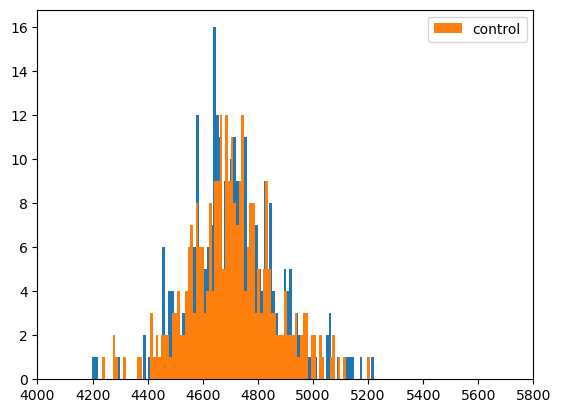

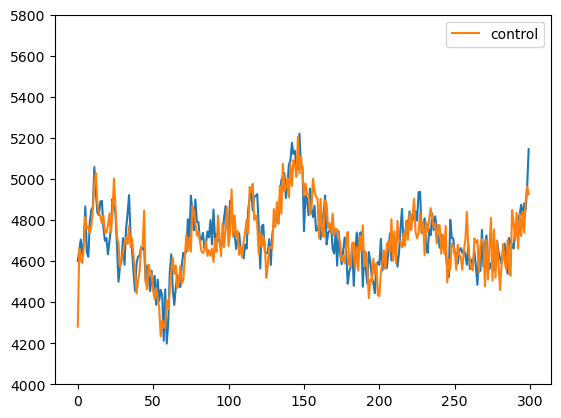

In [105]:
plt.hist(photocounts, bins=100)
plt.hist(photocounts_control, bins=100,label='control')
plt.legend()
plt.xlim((4000,5800))
plt.show()
plt.plot(photocounts)
plt.plot(photocounts_control,label='control')
plt.legend()
plt.ylim((4000,5800))
plt.show()

control experiment with the RP off. the data indicates that the SPCM signal is not actually from the MOT, despite what I saw with the SamplerCoilTune run just before running these. So apparently it drifts.

In [96]:
f = h5py.File(os.path.join(results, '2023-09-05\\13\\000004921-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts_noRP = list(f['datasets']['photocounts'])[1:]

f = h5py.File(os.path.join(results, '2023-09-05\\13\\000004920-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts = list(f['datasets']['photocounts'])[1:]

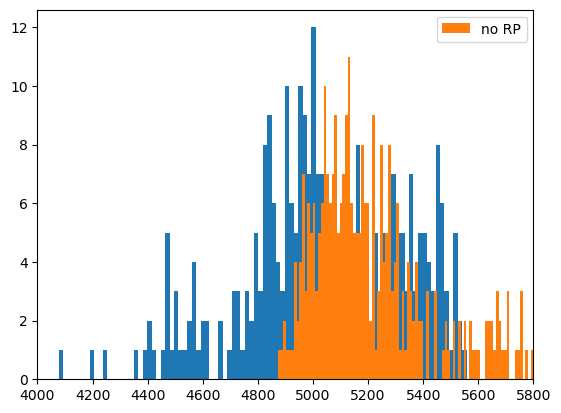

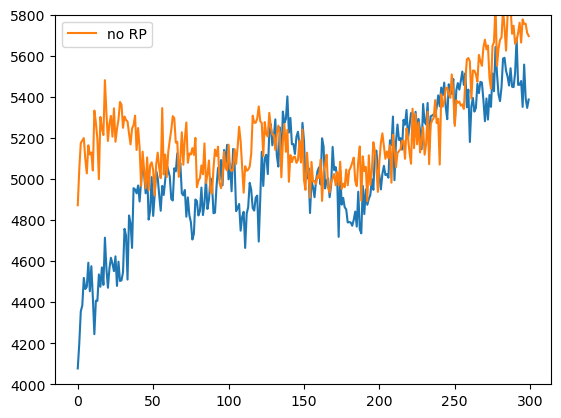

In [98]:
plt.hist(photocounts, bins=100)
plt.hist(photocounts_noRP, bins=100,label='no RP')
plt.legend()
plt.xlim((4000,5800))
plt.show()
plt.plot(photocounts)
plt.plot(photocounts_noRP,label='no RP')
plt.legend()
plt.ylim((4000,5800))
plt.show()

In [ ]:
atom loading experiment

In [91]:
f = h5py.File(os.path.join(results, '2023-09-05\\13\\000004920-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts = list(f['datasets']['photocounts'])[1:]

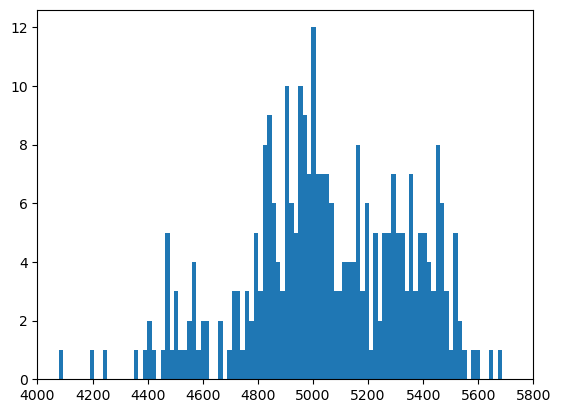

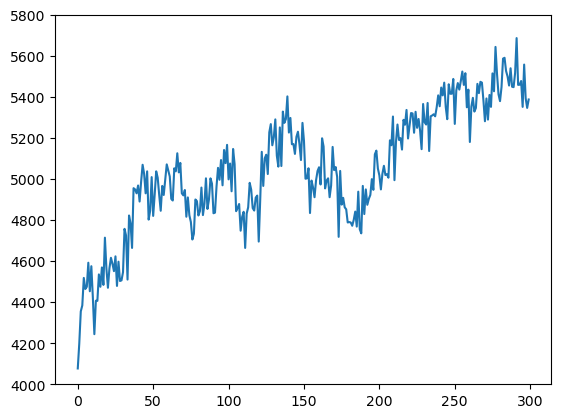

In [92]:
plt.hist(photocounts, bins=100)
plt.xlim((4000,5800))
plt.show()
plt.plot(photocounts)
plt.ylim((4000,5800))
plt.show()

In [ ]:
plt.

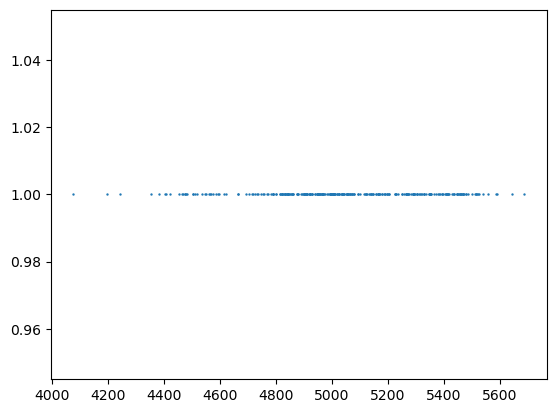

In [71]:
plt.scatter(photocounts,[1]*len(photocounts),s=0.5)

In [ ]:
ax=plt.contour(photocounts)
fig.colorbar()

### 2023.09.04

control experiment with the FORT off shows that most of the background is just from the FORT being on. This should be fixed before proceeding, most likely.

In [45]:
f = h5py.File(os.path.join(results, '2023-09-04\\16\\000004869-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts = list(f['datasets']['photocounts'])[1:]

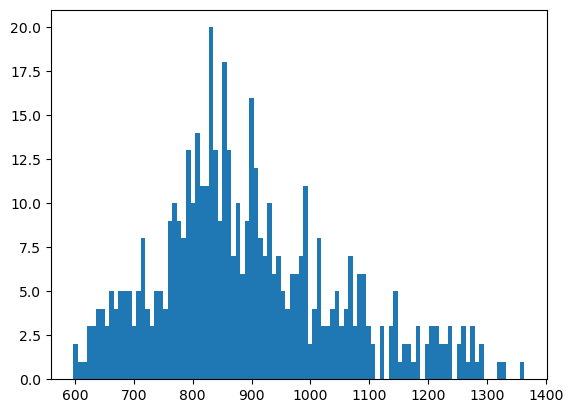

In [46]:
plt.hist(photocounts, bins=100)
plt.show()

In [48]:
f = h5py.File(os.path.join(results, '2023-09-04\\15\\000004868-SimpleAtomTrapNoChop.h5'))
# [x for x in f['datasets'].values()]
photocounts = list(f['datasets']['photocounts'])[1:]

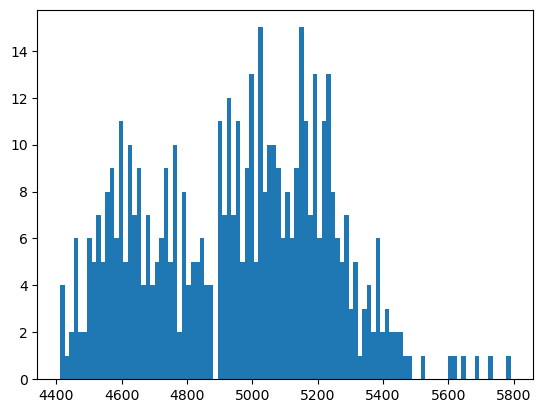

In [51]:
plt.hist(photocounts, bins=100)
plt.show()

In [30]:
[x for x in f['datasets'].values()]

[<HDF5 dataset "AOM_A1_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A2_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A3_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A4_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A5_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A6_power": shape (), type "<f8">,
 <HDF5 dataset "MOT1_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT2_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT3_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT4_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT5_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT6_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "MOT_switchyard_monitor": shape (71,), type "<f8">,
 <HDF5 dataset "monitor_pts": shape (1,), type "<i4">,
 <HDF5 dataset "p_cooling_DP_MOT": shape (), type "<f8">,
 <HDF5 dataset "photocount_bins": shape (1,), type "<i4">,
 <HDF5 dataset "photocounts": shape (501,), type "<i4">]

In [31]:
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]

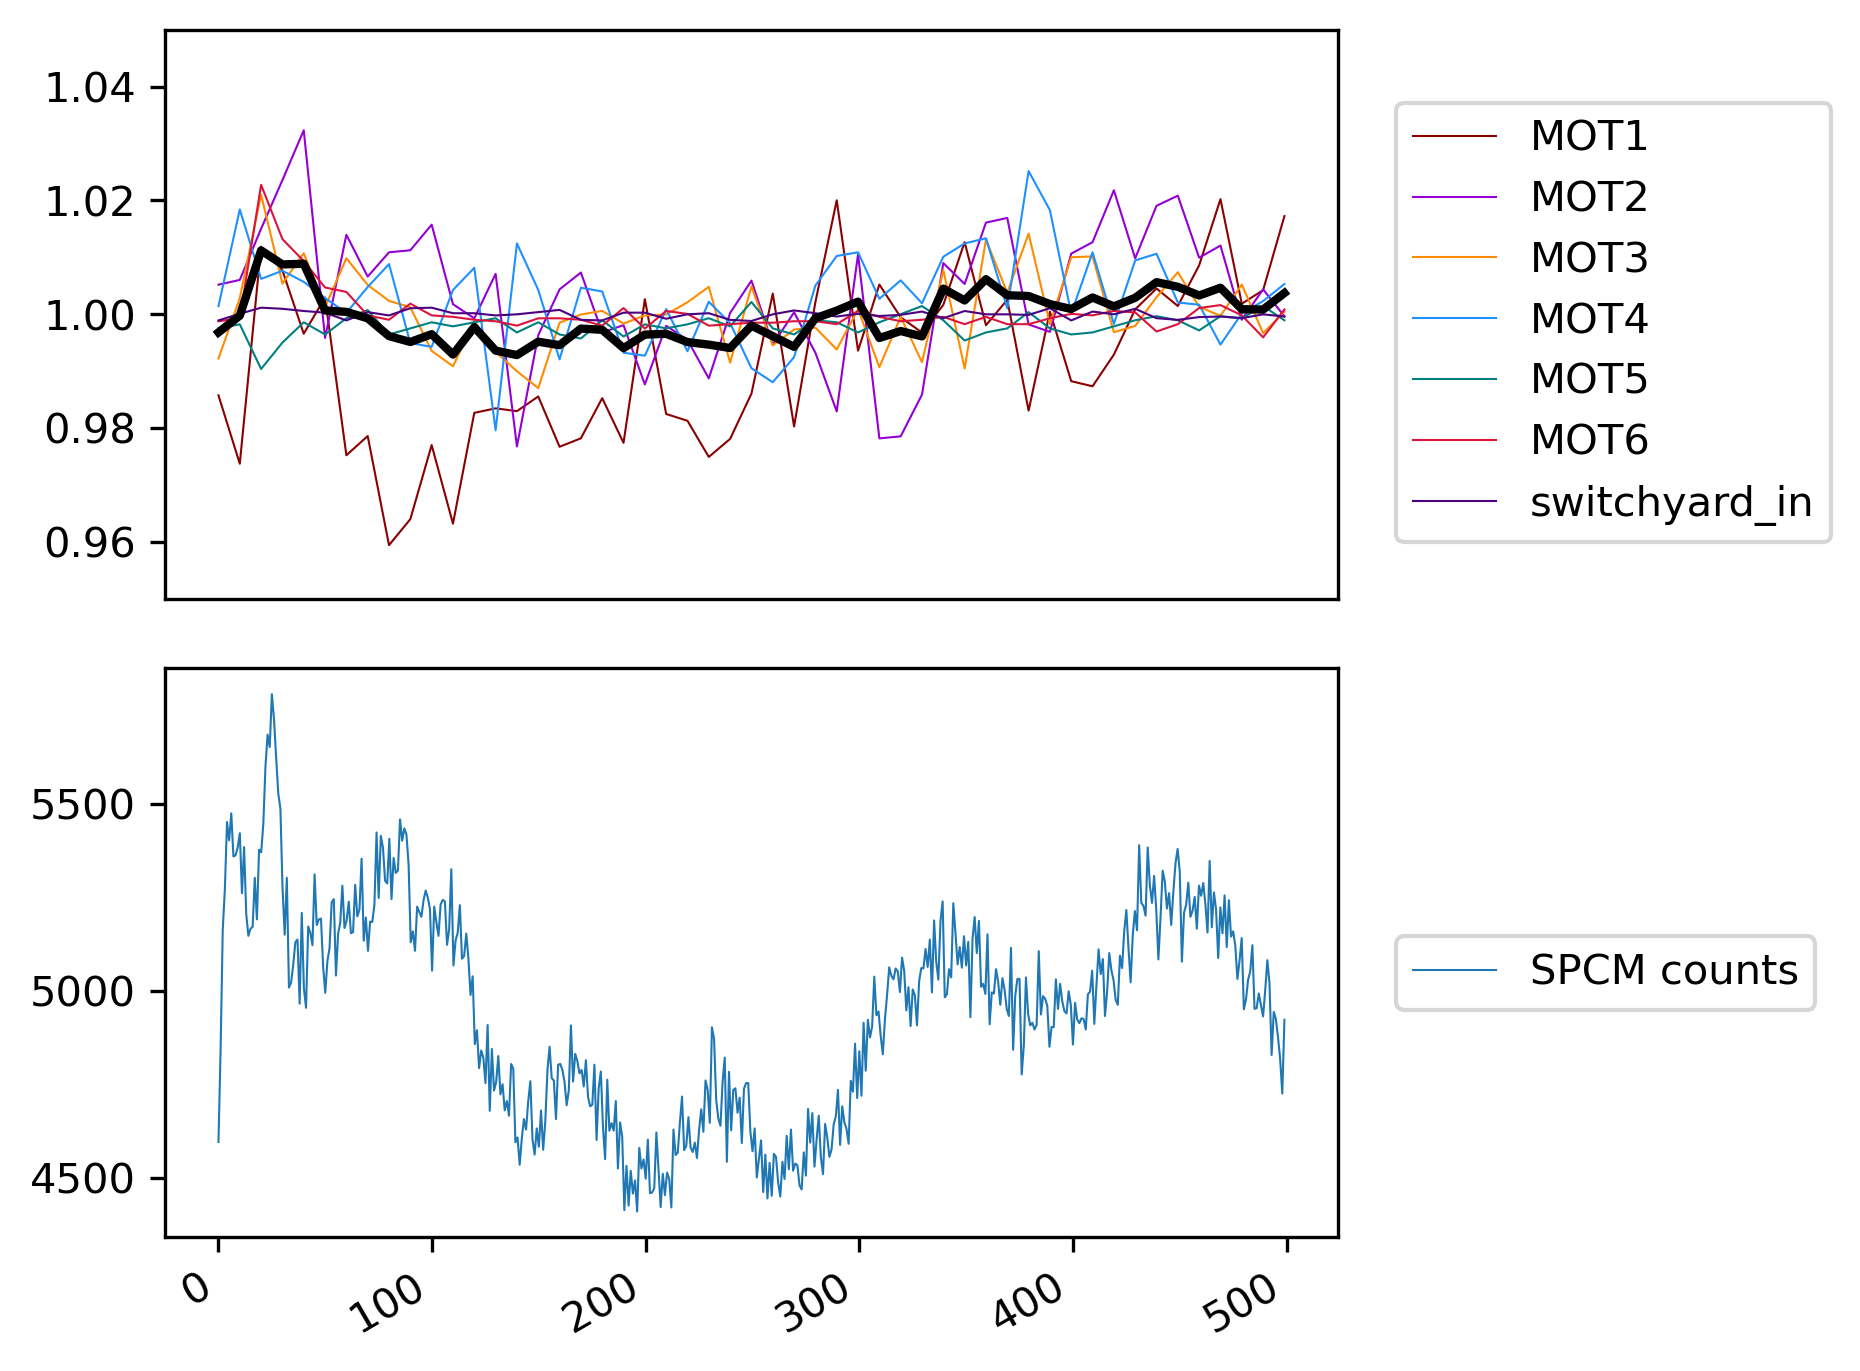

In [44]:
labels = [f'MOT{i+1}' for i in range(6)]+['switchyard_in']
fig,axes = plt.subplots(nrows=2,dpi=300)
ax, ax2 = axes
colors = ['darkred','darkviolet','darkorange','dodgerblue','teal','crimson','indigo']
for label,data,color in zip(labels,MOTdata,colors):
    ypts = data[20:] # the feedback runs 20 times before we start counting photons
    xpts = range(len(ypts))
#     ax.scatter(xpts, ypts, color=color,s=0.1)
    ax.plot(xpts, ypts, color=color, label=label,linewidth=0.5)
    ax.set_ylim((0.95,1.05))
    ax.legend(loc=(1.05,0.1))
ax.get_xaxis().set_visible(False)
counts_steps = len(photocounts)

ax.plot(np.mean([x[20:] for x in MOTdata[:-1]],axis=0),linewidth=2,c='k')

ax2.plot(range(counts_steps),photocounts,label='SPCM counts',linewidth=0.5)
# ax2.set_xticks(timestamps)
plt.gcf().autofmt_xdate()
ax2.legend(loc=(1.05,0.4))
fig.tight_layout()

## May 2023

In [30]:
expdir = "C:\\Networking Experiment\\artiq codes\\artiq-master\\repository\\qn_artiq_routines\\analysis\\csv_data\\"
datafile = os.path.join(expdir,"results\\20230531_083727_atom_loading_counts.csv") # no FORT

has_header = True
with open(datafile, 'r', newline='') as f:
    reader = csv.reader(f)
    if has_header:
        header = reader.__next__()
    data = [row for row in reader]
    f.close()

data = np.array(data,float).transpose()
rows,cols = data.shape
print("rows:", rows, "cols:", cols)

counts = data[0]

rows: 1 cols: 200


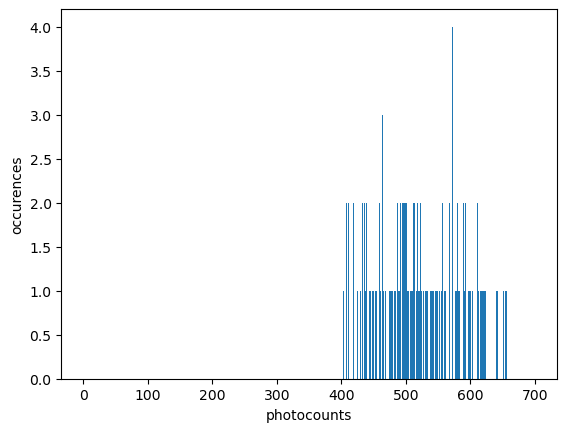

In [29]:
fig, ax = plt.subplots()
# bins = np.linspace(int(min(counts))-10,int(max(counts))+10,int(max(counts))-int(min(counts))+20)
bins = np.linspace(1,700,700)
ax.hist(counts,bins=bins)
ax.set_xlabel("photocounts")
ax.set_ylabel("occurences")
plt.show()

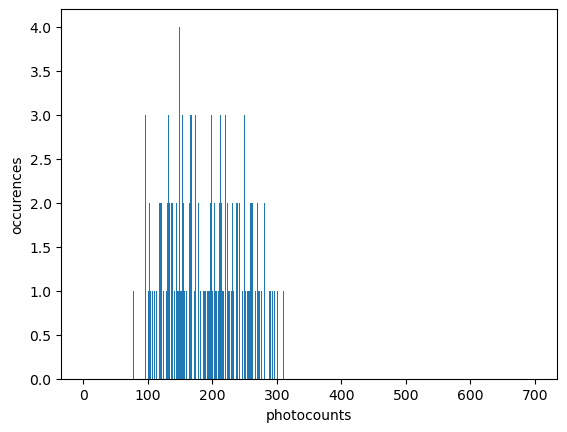

In [31]:
fig, ax = plt.subplots()
# bins = np.linspace(int(min(counts))-10,int(max(counts))+10,int(max(counts))-int(min(counts))+20)
bins = np.linspace(1,700,700)
ax.hist(counts,bins=bins)
ax.set_xlabel("photocounts")
ax.set_ylabel("occurences")
plt.show()

In [9]:
ax.hist?